In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s e

In [2]:
!pip install gradio==3.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 0.16.4
    Uninstalling gradio_client-0.16.4:
      Successfully uninstalled gradio_client-0.16.4
  Attempting uninstall: gradio
    Found existing installation: gradio 4.31.5
    Uninstalling gradio-4.31.5:
      Successfully uninstalled gradio-4.31.5


In [3]:
import pandas as pd
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('/content/Crop_recommendation (1).csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
data.shape

(2200, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
corr=data.corr()
corr

ValueError: could not convert string to float: 'rice'

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [11]:
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

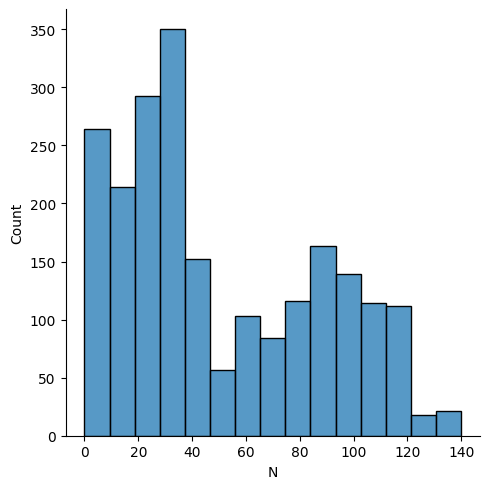

In [14]:
sns.displot(data['N'])
plt.show()

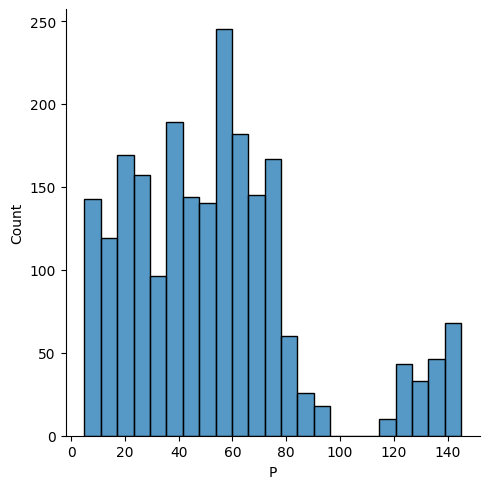

In [15]:
sns.displot(data['P'])
plt.show()

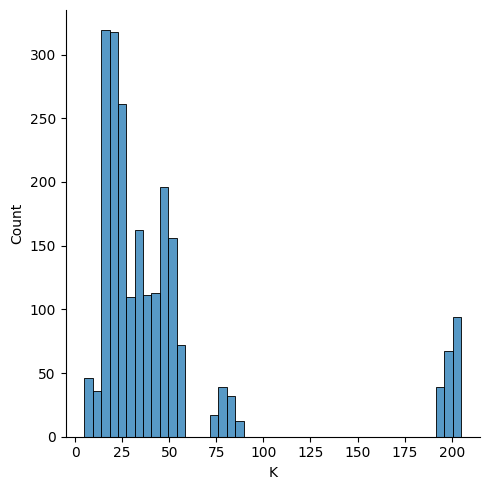

In [16]:
sns.displot(data['K'])
plt.show()

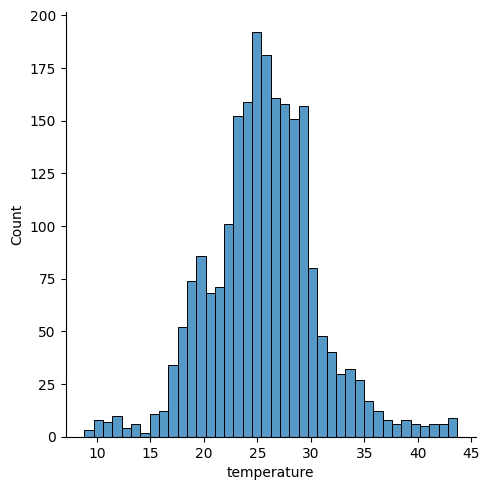

In [17]:
sns.displot(data['temperature'])
plt.show()

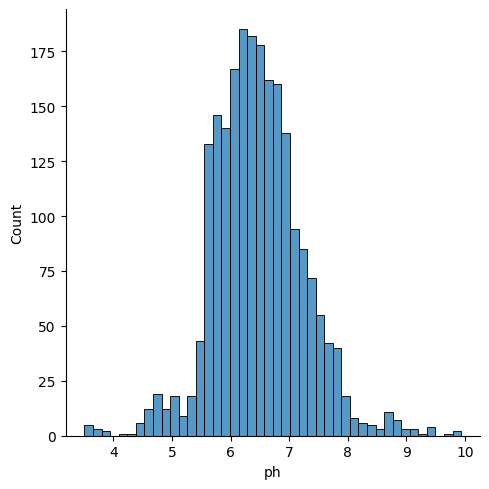

In [18]:
sns.displot(data['ph'])
plt.show()

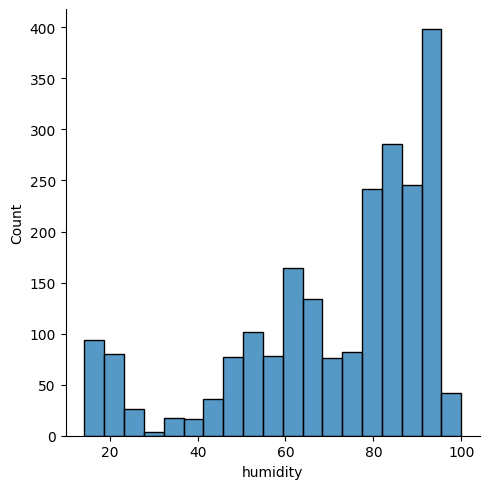

In [19]:
sns.displot(data['humidity'])
plt.show()

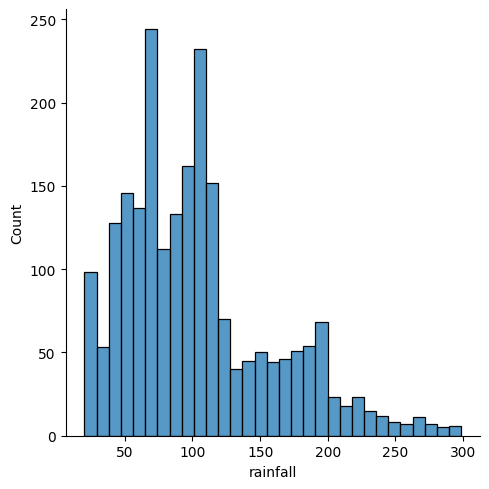

In [20]:
sns.displot(data['rainfall'])
plt.show()

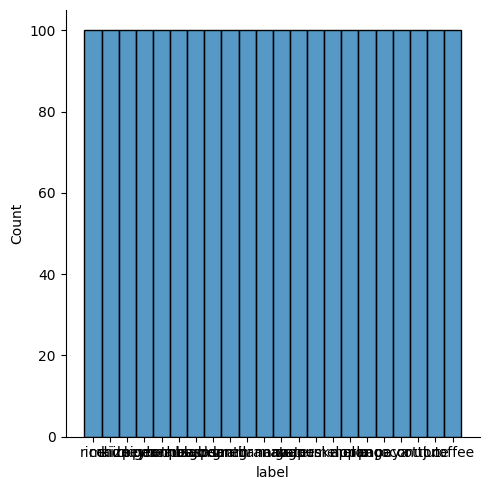

In [21]:
sns.displot(data['label'])
plt.show()

In [22]:
# Split dataset into features and target variable
x = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

In [23]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [24]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [25]:
x.shape

(2200, 7)

In [26]:
y.shape

(2200,)

In [33]:
# Split dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
xtrain.shape

(1760, 7)

In [35]:
ytrain.shape

(1760,)

In [36]:
xtest.shape

(440, 7)

In [37]:
ytest.shape

(440,)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
ms=MinMaxScaler()
ms.fit(xtrain)
xtrain=ms.transform(xtrain)
xtest=ms.transform(xtest)

In [40]:
xtrain

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [41]:
xtest

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc=StandardScaler()
sc.fit(xtrain)
xtrain=sc.transform(xtrain)
xtest=sc.transform(xtest)

In [44]:
xtrain

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [45]:
xtest

array([[ 1.34934948, -1.0960582 , -0.02225388, ...,  1.05232434,
        -0.37619899, -1.38984486],
       [ 1.26889319, -1.36698971,  0.05607978, ...,  0.67956909,
        -0.28013033, -0.96895253],
       [ 0.22296144,  0.25859933,  0.01691295, ...,  0.98974316,
         0.60209743,  0.22056087],
       ...,
       [ 1.88572474, -0.19295318, -0.62933977, ...,  0.35134079,
         1.61311363, -0.54905776],
       [ 1.75163092, -0.04243567, -0.57058952, ...,  0.1731198 ,
        -0.46741089, -0.64767698],
       [-1.22525175,  0.43922034, -0.55100611, ..., -1.74645651,
        -0.45817577,  0.95946086]])

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [47]:
# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(xtrain,ytrain)
    ypred = md.predict(xtest)

    print(f"{name}  with accuracy : {accuracy_score(ytest,ypred)}")

Logistic Regression  with accuracy : 0.9636363636363636
Naive Bayes  with accuracy : 0.9954545454545455
Support Vector Machine  with accuracy : 0.9681818181818181
K-Nearest Neighbors  with accuracy : 0.9568181818181818
Decision Tree  with accuracy : 0.9886363636363636
Random Forest  with accuracy : 0.9931818181818182
Bagging  with accuracy : 0.9886363636363636
AdaBoost  with accuracy : 0.1409090909090909
Gradient Boosting  with accuracy : 0.9818181818181818
Extra Trees  with accuracy : 0.8954545454545455


In [48]:
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ytest,ypred)

0.9954545454545455

In [49]:
# Define the function for crop recommendation
def recommend_crop(N,P,K,temperature,humidity,ph,rainfall):
    input_data = [[N,P,K,temperature,humidity,ph,rainfall]]
    predicted_crop = model.predict(input_data)[0]
    return predicted_crop

In [50]:
# Create input components for Gradio
N= gr.inputs.Number(label="Nitrogen (N)")
P= gr.inputs.Number(label="Phosphorus (P)")
k= gr.inputs.Number(label="Potassium (K)")
temperature= gr.inputs.Number(label="Temperature (°C)")
humidity= gr.inputs.Number(label="Humidity (%)")
ph= gr.inputs.Number(label="Soil pH")
rainfall= gr.inputs.Number(label="Rainfall (mm)")

<ipython-input-50-79209c4e2ac8>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  N= gr.inputs.Number(label="Nitrogen (N)")
<ipython-input-50-79209c4e2ac8>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  N= gr.inputs.Number(label="Nitrogen (N)")
<ipython-input-50-79209c4e2ac8>:3: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  P= gr.inputs.Number(label="Phosphorus (P)")
<ipython-input-50-79209c4e2ac8>:3: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  P= gr.inputs.Number(label="Phosphorus (P)")
<ipython-input-50-79209c4e2ac8>:4: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  k= gr.

In [55]:
# Create Gradio interface
gr.Interface(fn=recommend_crop,
             inputs=[N,P,k,temperature,humidity,ph,rainfall],
             outputs="text",
             title="Crop Recommendation System",
             description="Get personalized crop recommendations based on environmental factors! Input Nitrogen (N), Phosphorus (P), Potassium (K), Temperature, Humidity, pH, and Rainfall, and discover the best crop for your region Click \"Predict\" to receive instant recommendations, guiding your agricultural decisions for a successful harvest.",
             theme="compact",  # Change the theme
             layout="vertical",  # Change layout
             allow_flagging=False,  # Disable flagging
             allow_screenshot=False,  # Disable screenshot
             allow_monospace_font=False).launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:699: UserWarning: Cannot load compact. Caught Exception: The space compact does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")
<ipython-input-55-8035ffc4db70>:2: GradioDeprecationWarning: `allow_screenshot` parameter is deprecated, and it has no effect
  gr.Interface(fn=recommend_crop,
<ipython-input-55-8035ffc4db70>:2: GradioDeprecationWarning: `layout` parameter is deprecated, and it has 

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

IMPORTANT: You are using gradio version 3.41.0, however version 4.29.0 is available, please upgrade.

In [ ]:
# Customize the interface design
interface = gr.Interface(fn=recommend_crop, inputs=[temperature, rainfall, humidity, soil_type],
                         outputs=output_text,
                         title="Crop Recommendation System",
                         description="Enter environmental factors to get crop recommendation.",
                         theme="compact",  # Change the theme
                         layout="vertical",  # Change layout
                         allow_flagging=False,  # Disable flagging
                         allow_screenshot=False,  # Disable screenshot
                         allow_monospace_font=False)  # Disable monospace font

interface.launch()